## Observations and Insights 

Obserations:
1) I find it very interesting that though many Drug Regimens did improve the survival rate of mice as seen in the Capomulin, Ceftamin, Ramicane, Naftisol, and Zoniferol treatments which had more mice at the end of the experiment than the Placebo group, 2 treatments had less Mice at the end of the experiment than the Placebo including Infubinol and Propriva.  Furthermore, the fact that we studied Infubinol as one of the 4 most effective because of it's impact on tumor size even though it had the second fewest mice survive is weird to me.  I wouldn't have considered Infubinol as one of the most effective. All this supports repeated and further testing.

2) I am surprise that weight of the mouse had such a strong correlation with tumor volume.  I don't know much about tumors, but I wouldn't expect tumors to be dependent on the weight of the mouse getting the tumor.  Curious if it takes a larger tumor therfore to kill a larger mouse.  Meaning is a deadly tumors weight based on the weight of the mouse?

3) If we were to do statistical analysis on the effectiveness I think we would find the Capomulin and Remicine to be the statistically significant which average mean sizes about 25% lower than the placebo.  The rest have very similar average tumor sizes to the placebo.

4) The decrease in tomor size for the S-185 mouse using Capomulin was approximately linear.  I would be curious to look at the trend of tumor volume for the other mice treated with Capomulin.

In [269]:
%matplotlib inline

In [270]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.head())
print(study_results.head())

# Combine the data into a single dataset
results_df = mouse_metadata.merge(study_results, how = 'inner',on = 'Mouse ID')

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [271]:
# Checking the number of mice in the DataFrame.
results_df["Mouse ID"].count()

1893

In [272]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
results_df[results_df[["Mouse ID","Drug Regimen","Timepoint"]].duplicated() == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [273]:
# Optional: Get all the data for the duplicate mouse ID. 

results_df[results_df["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [274]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results_df.drop_duplicates(["Mouse ID","Timepoint"],keep = 'first',inplace = True)


In [275]:
# Checking the number of mice in the clean DataFrame.
results_df["Mouse ID"].count()

1888

## Summary Statistics

In [276]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = results_df.groupby("Drug Regimen")
#grouped_summary=grouped["Tumor Volume (mm3)"].describe()
regimens = results_df["Drug Regimen"].unique()
means = round(grouped_df["Tumor Volume (mm3)"].mean(),2)
medians = round(grouped_df["Tumor Volume (mm3)"].median(),2)
variances = round(grouped_df["Tumor Volume (mm3)"].var(),4)
standard_devs = round(grouped_df["Tumor Volume (mm3)"].std(),4)
sems = round(grouped_df["Tumor Volume (mm3)"].sem(),4)
# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [277]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Stats_df = pd.DataFrame({"Mean Tumor Size":means,"Median Tumor Size":medians,"Var":variances,"StDev": standard_devs,"SEM":sems})
Summary_Stats_df

,Mean Tumor Size,Median Tumor Size,Var,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.9478,4.9948,0.3293
Ceftamin,52.59,51.78,39.2902,6.2682,0.4698
Infubinol,52.88,51.82,43.1287,6.5672,0.4922
Ketapril,55.24,53.70,68.5536,8.2797,0.6039
Naftisol,54.33,52.51,66.1735,8.1347,0.5965
Placebo,54.03,52.29,61.1681,7.8210,0.5813
Propriva,52.39,50.91,43.1388,6.5680,0.5259
Ramicane,40.22,40.67,23.4867,4.8463,0.3210
Stelasyn,54.23,52.43,59.4506,7.7104,0.5731


## Bar Plots

In [278]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

reg_time_df = results_df.groupby(["Drug Regimen","Timepoint"])
reg_time = reg_time_df["Mouse ID"].count()
reg_time = reg_time.reset_index()
MiceCountpd_df = pd.DataFrame(reg_time)
MiceCountpd_df.rename(columns = {"Mouse ID":"Count"},inplace = True)
#
MiceCountplt_df = MiceCountpd_df.copy()
MiceCountpd_df = MiceCountpd_df.set_index("Timepoint")
#Format dataframe to plot using MatPlot Lib
MiceCountplt_df = MiceCountplt_df.pivot(index = "Timepoint",columns = "Drug Regimen",values = "Count")
#Curious to see the count of Mice by Drug Regimen as the number of days increased. The graphs are nice, but the following
# I think is easier to digest.
MiceCountplt_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,24,25
5,25,21,25,23,23,24,24,25,23,24
10,25,20,21,22,21,24,22,24,21,22
15,24,19,21,19,21,20,16,24,21,21
20,23,18,20,19,20,19,16,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


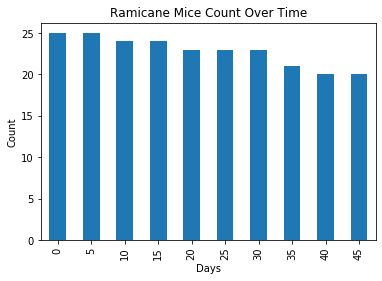

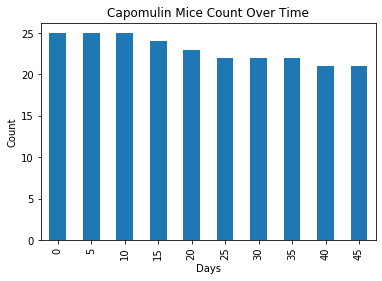

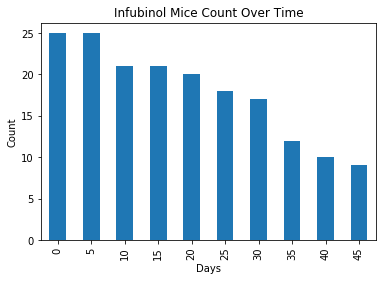

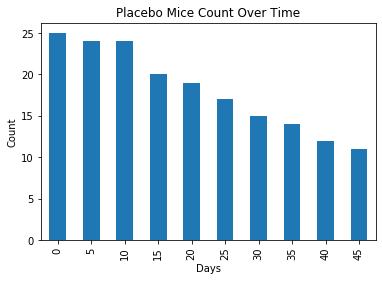

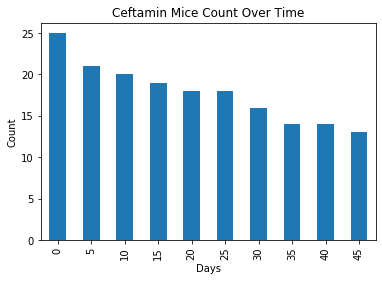

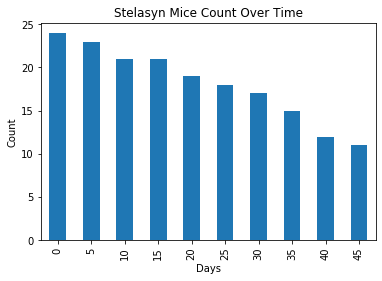

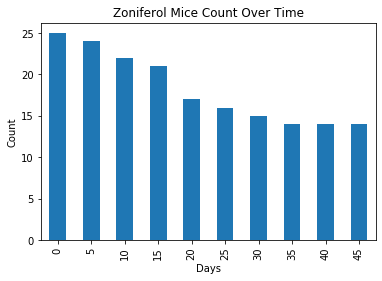

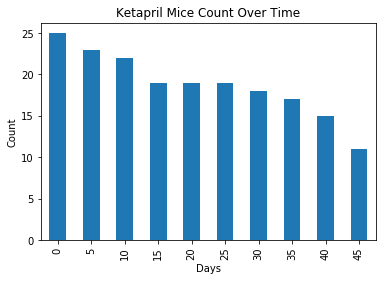

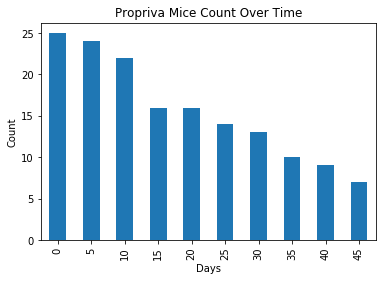

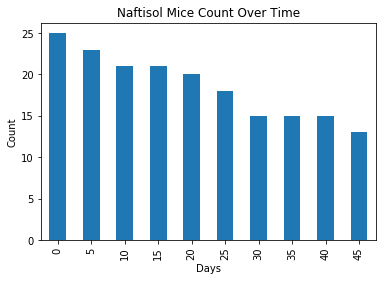

In [279]:
for i in regimens:
   
    a = MiceCountpd_df[MiceCountpd_df['Drug Regimen']==i]
    name = i
    y = a.plot(kind = 'bar',legend = False)
    y.set_ylabel("Count")
    y.set_xlabel("Days")
    y.set_title(f"{name} Mice Count Over Time")
    
   
   


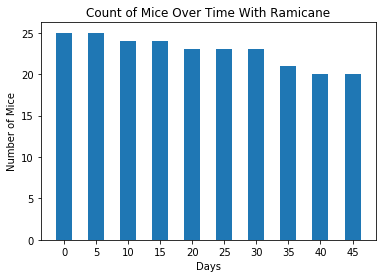

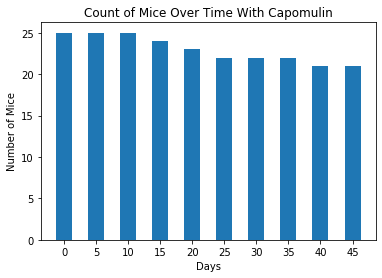

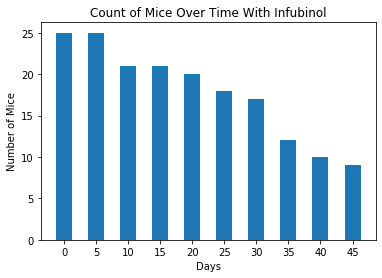

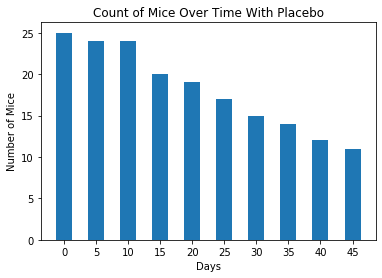

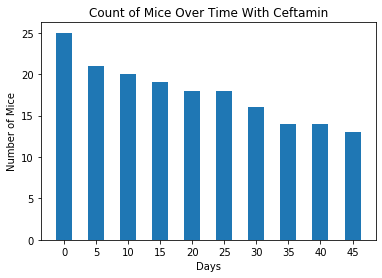

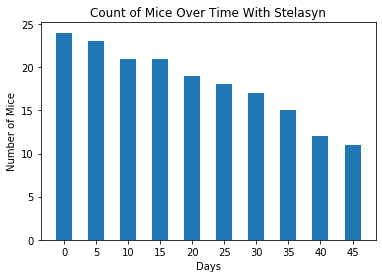

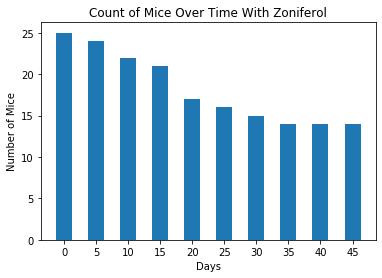

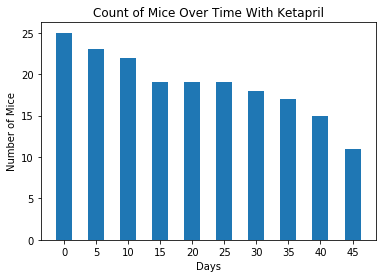

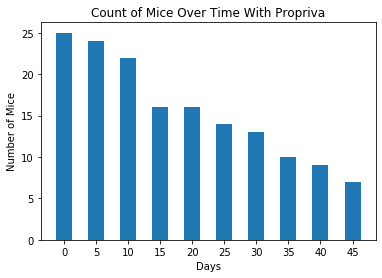

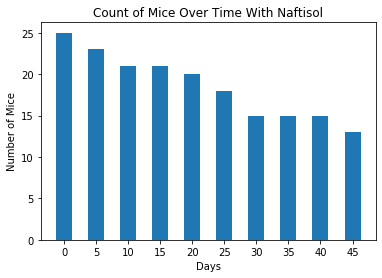

In [280]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis=[0,5,10,15,20,25,30,35,40,45]
for i in regimens:
    x = i
    y_axis = MiceCountplt_df[i]
    fig1 = plt.bar(x_axis,y_axis,width = 2.5, tick_label = x_axis)
    plt.title(f"Count of Mice Over Time With {x}")
    plt.xlabel("Days")
    plt.ylabel("Number of Mice")
    plt.show()

## Pie Plots

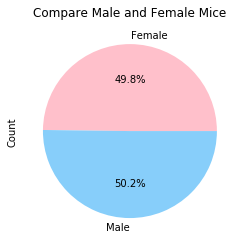

In [281]:
# Generate a pie plot showing the distribution of female versus male mice using pandas76
gender_groups = mouse_metadata.groupby("Sex")
gender_count = gender_groups["Mouse ID"].count()
gender_count = gender_count.reset_index()
pand_gender = pd.DataFrame(gender_count)
#pand_gender=pand_gender.reset_index()  
pand_gender.rename(columns={"Mouse ID":"Count"}, inplace = True)
pand_gender =pand_gender.set_index("Sex")
colors = ["pink","lightskyblue"]
pand_gender.plot(y="Count", kind = 'pie',title ="Compare Male and Female Mice",autopct="%1.1f%%",colors = colors, legend = False)

Text(0.5, 1.0, 'Compare Male and Female Mice')

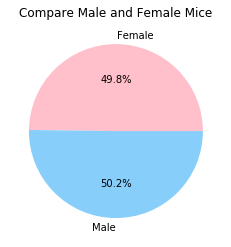

In [282]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_groups = mouse_metadata.groupby("Sex")
gender_count = gender_groups["Mouse ID"].count()
labels =['Female','Male']
colors = ["pink","lightskyblue"]

plt.pie(gender_count,labels = labels,colors = colors,autopct="%1.1f%%")
plt.title("Compare Male and Female Mice")

## Quartiles, Outliers and Boxplots

In [283]:
# Group data frame by Mouse ID so that you can then find the max of the timepoint column to know when each mouse was last weighed
final_volume = results_df.groupby("Mouse ID")
final_volume=final_volume["Timepoint"].max()

#Turn it into a dataframe to be able to merge it with another dataframe
final_volume = pd.DataFrame(final_volume)

#Get the Mouse ID as a column so we can join on Mouse ID
fin_tum_vol = final_volume.reset_index()

#Merge the new df with the results df on Mouse ID and Timepoint so that you are only left with the mouses final weighing
#Need to pull Tumor Size and Weight back into the data frame to study
Max_living_volume =pd.merge(fin_tum_vol,results_df, how = 'inner', on = ["Mouse ID", "Timepoint"])
Max_living_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [284]:
#Set Drug Regimen as the index so we can utilize the .loc function to select the 4 most effective treatments
Max_living_volume.set_index("Drug Regimen", inplace = True)

In [285]:
#Create list of most effective treatments for selection with .loc function
Selected = ["Ramicane","Capomulin","Infubinol","Ceftamin"]

#Use .loc function to just get tumor volume of last weigh in for each mouse
Fin_tumor_volume = Max_living_volume.loc[Selected,"Tumor Volume (mm3)"] 

#Turn into a dataframe
reg_tum_vol=pd.DataFrame(Fin_tumor_volume)
reg_tum_vol.sort_values("Tumor Volume (mm3)")

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,22.050126
Capomulin,23.343598
Capomulin,28.430964
Capomulin,28.484033
Ramicane,29.128472
...,...
Ceftamin,67.748662
Infubinol,67.973419
Ceftamin,68.594745


In [286]:
#find the descriptive values and store in a dataframe so values can be called
info = reg_tum_vol.describe()

#calls and store the q1 and q3 values
q1 = round(float(info.loc['25%'].values),2)
q3 = round(float(info.loc['75%'].values),2)
median = round(float(info.loc['50%'].values),2)
#calculate IQR
IQR = q3-q1

#Find the potential outlier boundaries
lower_extreme = q1-(1.5)*IQR
upper_extreme = q3 + (1.5)*IQR

#print out the different values found
print(f"The lower quartile of tumor volume is: {q1}")
print(f"The median tumor volume is: {median}")
print(f"The lower quartile of tumor volume is: {q3}")
print(f"The interquartile range of tumor volume is: {IQR}")
print(f"Values below {lower_extreme} could be outliers.")
print(f"Values above {upper_extreme} could be outliers.")

The lower quartile of tumor volume is: 37.19
The median tumor volume is: 45.0
The lower quartile of tumor volume is: 59.93
The interquartile range of tumor volume is: 22.740000000000002
Values below 3.0799999999999983 could be outliers.
Values above 94.03999999999999 could be outliers.


Text(0.5, 1.0, 'Final Tumor Volume of 4 Most Promising Treatments')

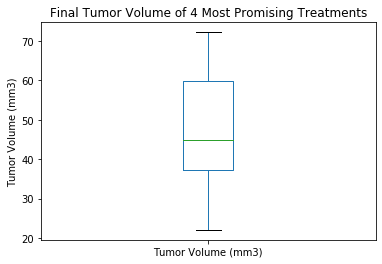

In [287]:
#THIS WAS NOT REQURIED, BUT I WANTED TO LOOK.  BOX PLOTS BY TREATMENT BELOW
#Generate box plot of Final Tumor Sizes of Top 4 Regimens
reg_tum_vol.plot(kind = 'box')
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volume of 4 Most Promising Treatments")

THE CODE BELOW IF FOR DOING ALL OF THE Q1,MED,Q3 and Outlier INFO for each Drug Regimen

In [288]:
for i in Selected:
    
    name = i
    #Select Tumor volume data for regimen
    FTV = Max_living_volume.loc[i,"Tumor Volume (mm3)"]
    
    #convert to a dataframe
    rtv = pd.DataFrame(FTV)
    a=rtv.loc[i]["Tumor Volume (mm3)"]
    info = a.describe()
    
    
    #calls and store the q1, median and q3 values
    q1 = round(info.loc['25%'],2)
    q3 = round(info.loc['75%'],2)
    median = round(info.loc['50%'],2)
    #calculate IQR
    IQR = q3-q1

    #Find the potential outlier boundaries
    lower_extreme = q1-(1.5)*IQR
    upper_extreme = q3 + (1.5)*IQR
    
    print("The summary statistics for " + name+ ".")
    print(f"The lower quartile of tumor volume is: {q1}")
    print(f"The median tumor volume is: {median}")
    print(f"The lower quartile of tumor volume is: {q3}")
    print(f"The interquartile range of tumor volume is: {IQR}")
    print(f"Values below {lower_extreme} could be outliers.")
    print(f"Values above {upper_extreme} could be outliers. \n")

The summary statistics for Ramicane.
The lower quartile of tumor volume is: 31.56
The median tumor volume is: 36.56
The lower quartile of tumor volume is: 40.66
The interquartile range of tumor volume is: 9.099999999999998
Values below 17.910000000000004 could be outliers.
Values above 54.309999999999995 could be outliers. 

The summary statistics for Capomulin.
The lower quartile of tumor volume is: 32.38
The median tumor volume is: 38.13
The lower quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.779999999999994
Values below 20.71000000000001 could be outliers.
Values above 51.829999999999984 could be outliers. 

The summary statistics for Infubinol.
The lower quartile of tumor volume is: 54.05
The median tumor volume is: 60.17
The lower quartile of tumor volume is: 65.53
The interquartile range of tumor volume is: 11.480000000000004
Values below 36.82999999999999 could be outliers.
Values above 82.75 could be outliers. 

The summary statistics for Ceft

([<matplotlib.axis.XTick at 0x2f704c71fc8>,
 <a list of 4 Text xticklabel objects>)

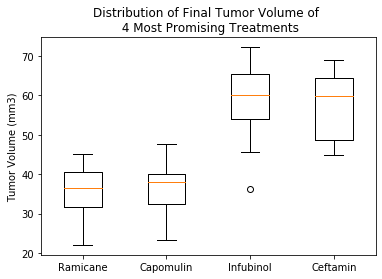

In [289]:
#Create box plots of each regimens final tumor volumes

#List to hold the different series of data for each Treatment
box_list=[]

#Loop through the Selected Treatments and save each Tumor Volume as a series
for i in Selected:
    a=reg_tum_vol.loc[i]["Tumor Volume (mm3)"]
    
    box_list.append(a)
    

# Create a place for the box plots to plot
fig,ax = plt.subplots()


# Create the boxplots
ax.boxplot(box_list)

#Add title, y-axis label, and change the x-axis labels
plt.title("Distribution of Final Tumor Volume of \n 4 Most Promising Treatments")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4],Selected)


## Line and Scatter Plots

Text(0.5, 0, 'Days')

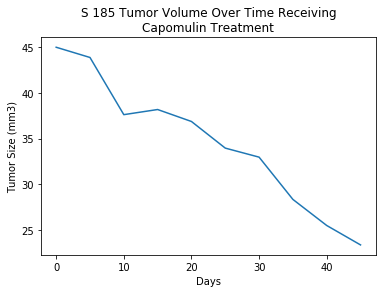

In [290]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Make Timepoint the index
results_df =results_df.set_index("Timepoint")
#check out the options of mice that were in the Capomulin treatment group
results_df[results_df["Drug Regimen"]=="Capomulin"].head(10)
#Select data for just Mouse ID s185
s185 = results_df[results_df["Mouse ID"]=='s185']
#create a series of just tumor volume for S 185
s185 = s185.iloc[:,5] #.loc["Tumor Volume (mm3)"]
#create line plot
s185.plot()

#label tile, y-axis, and x-axis
plt.title("S 185 Tumor Volume Over Time Receiving\nCapomulin Treatment")
plt.ylabel("Tumor Size (mm3)")
plt.xlabel("Days")

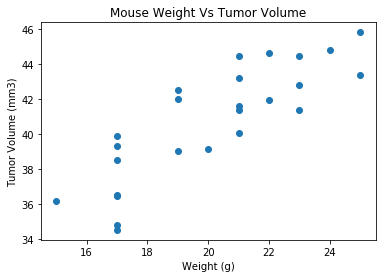

In [291]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Create Dataframe of only Capomulin data 
Cap = results_df[results_df["Drug Regimen"]=="Capomulin"]
#Group by MOUSE ID
Cap = Cap.groupby("Mouse ID")
#get the average tumor volume.  Weights stays consistent throughout so we can use the average for that as well
Cap_avg = Cap.mean()

#Store Weight column of Cap df as x_values
x_values = Cap_avg["Weight (g)"]
#Store Tumor volume of Cap df as y_values
y_values = Cap_avg['Tumor Volume (mm3)']
#plot weight vs tumor volume
plt.scatter(x_values, y_values)

#add title, xlablels, and ylabels
plt.title("Mouse Weight Vs Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

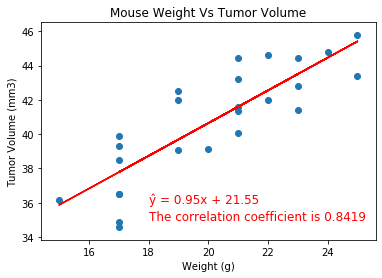

In [292]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#run linear regression and store key values
slope, intercept, r_value, p_value, std_err = st.linregress(Cap_avg['Weight (g)'],Cap_avg['Tumor Volume (mm3)'])

#generate predicted y values based on regression model
regress_values = x_values * slope + intercept

#store linear regression equation and correlation coefficient
line_eq = "ŷ = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_coef = "The correlation coefficient is " + str(round(r_value,4))

#plot regression line
plt.plot(x_values, regress_values, "r-")

#plot regression equation and correlation coefficient on the graph
plt.annotate(line_eq, (18,36),fontsize = 12, color = 'red')
plt.annotate(corr_coef,(18,35),fontsize = 12, color = 'red')

#Create scatter plot and add title, x-labels, and y-labels
plt.scatter(x_values, y_values)
plt.title("Mouse Weight Vs Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()